# Stability API - Initial Image Inference

**In this notebook we're going to go over how to use our API to perform an inference call with an initial image that affects our final result.**

In [1]:
#@title <a name="Step 1"><font color="#FFFFFF">1. Install the Stability SDK package.</font></a>
%pip install stability-sdk

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.2/117.2 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.5/8.5 MB 4.2 MB/s eta 0:00:0000:0100:01m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.9/3.9 MB 5.4 MB/s eta 0:00:0000:0100:01m
  Using cached python_dotenv-1.0.0-py3-none-any.whl (19 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 113.4/113.4 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.2/486.2 kB 13.6 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.1.2 -> 23.3.1
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [5]:
#@title <a name="Step 2"><font color="#FFFFFF">2. Set up our environment variables and API Key.</font></a>

import getpass, os

# Our host url should not be prepended with "https" nor should it have a trailing slash.
os.environ['STABILITY_HOST'] = 'grpc.stability.ai:443'

# Sign up for an account at the following link to get an API Key.
# https://platform.stability.ai/

# Click on the following link once you have created an account to be taken to your API Key.
# https://platform.stability.ai/account/keys

# Paste your API Key below after running this cell.

os.environ['STABILITY_KEY'] = getpass.getpass('Enter your API Key')

In [6]:
#@title <a name="Step 3"><font color="#FFFFFF">3. Import additional dependencies and establish our connection to the API.</font></a>

import io
import os
import warnings

from IPython.display import display
from PIL import Image
from stability_sdk import client
import stability_sdk.interfaces.gooseai.generation.generation_pb2 as generation


# Set up our connection to the API.
stability_api = client.StabilityInference(
    key=os.environ['STABILITY_KEY'], # API Key reference.
    verbose=True, # Print debug messages.
    engine="stable-diffusion-xl-1024-v1-0", # Set the engine to use for generation.
    # Check out the following link for a list of available engines: https://platform.stability.ai/docs/features/api-parameters#engine
)

512 768


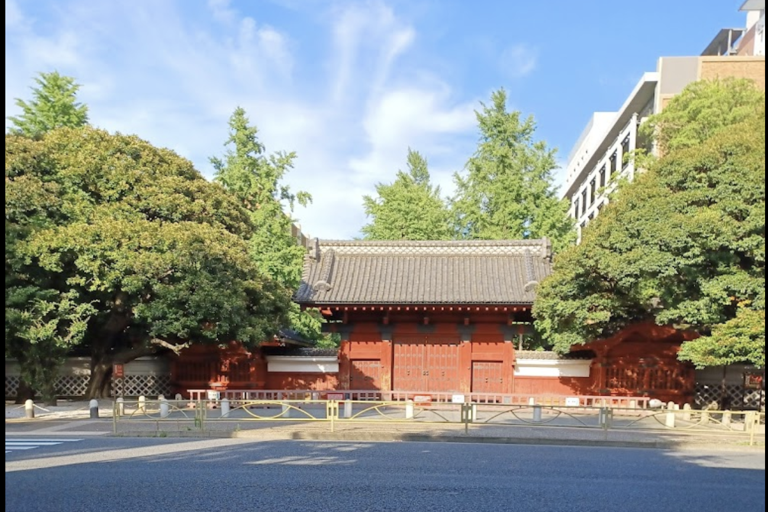

In [18]:

image_path = '/Users/jiangpeng/Desktop/haa1_team2/image/akamonn2.png'
img = Image.open(image_path)
img = img.resize((768, 512))
print(img.height, img.width)
img

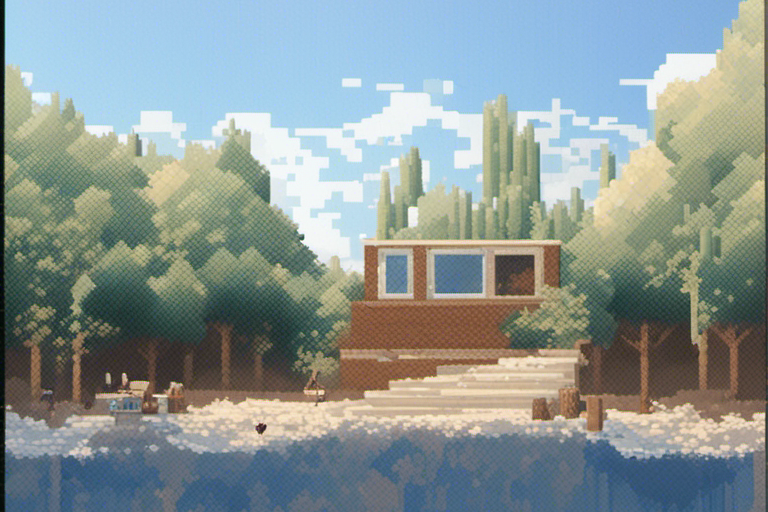

In [20]:
#@title <a name="Step 5"><font color="#FFFFFF">5. Set up an initial image based on our previous generation, and use a prompt to convert it into a crayon drawing.</font></a>

# Set up our initial generation parameters.
answers = stability_api.generate(
    prompt="Create an image in a pixel art style that represents a scene frozen in time in the year 2023. The image should maintain the original content, including the exact positions of objects and the overall composition. The only change should be the transformation of the photo into a pixel art representation, reflecting the distinctive aesthetic of pixelated visuals. The scene is set in 2023, so any visible technology, fashion, or environmental elements should subtly indicate this year, but without altering the fundamental elements of the original photo",
    init_image = img,
    # init_image="/content/img", # Assign our previously generated img as our Initial Image for transformation.
    start_schedule=0.6, # Set the strength of our prompt in relation to our initial image.
    seed=123463447, # If attempting to transform an image that was previously generated with our API,
                    # initial images benefit from having their own distinct seed rather than using the seed of the original image generation.
    steps=50, # Amount of inference steps performed on image generation. Defaults to 30.
    cfg_scale=9.5, # Influences how strongly your generation is guided to match your prompt.
                   # Setting this value higher increases the strength in which it tries to match your prompt.
                   # Defaults to 7.0 if not specified.
    width=786, # Generation width, defaults to 512 if not included.1298 × 950
    height=512, # Generation height, defaults to 512 if not included.
    style_preset="cinematic",
    sampler=generation.SAMPLER_K_DPMPP_2M # Choose which sampler we want to denoise our generation with.
                                                 # Defaults to k_dpmpp_2m if not specified. Clip Guidance only supports ancestral samplers.
                                                 # (Available Samplers: ddim, plms, k_euler, k_euler_ancestral, k_heun, k_dpm_2, k_dpm_2_ancestral, k_dpmpp_2s_ancestral, k_lms, k_dpmpp_2m, k_dpmpp_sde)
)

# Set up our warning to print to the console if the adult content classifier is tripped.
# If adult content classifier is not tripped, display generated image.
for resp in answers:
    for artifact in resp.artifacts:
        if artifact.finish_reason == generation.FILTER:
            warnings.warn(
                "Your request activated the API's safety filters and could not be processed."
                "Please modify the prompt and try again.")
        if artifact.type == generation.ARTIFACT_IMAGE:
            img2 = Image.open(io.BytesIO(artifact.binary)) # Set our resulting initial image generation as 'img2' to avoid overwriting our previous 'img' generation.
            display(img2)